In [165]:
# imports
import string
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('reuters')
from nltk.corpus import reuters
from nltk import FreqDist
from nltk.corpus import stopwords
# input the reuters sentences
sents = reuters.sents()

# write the removal characters such as : Stopwords and punctuation
stop_words = set(stopwords.words('english'))
string.punctuation = string.punctuation +'"'+'"'+'-'+'''+'''+'—' + '.-'
string.punctuation

word_to_int = {}
count = 0

[nltk_data] Downloading package punkt to /home/rachit0206/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rachit0206/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /home/rachit0206/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [166]:
from nltk.corpus import stopwords
import random
from sklearn.model_selection import train_test_split
random.seed(69)

In [167]:
stops = set(stopwords.words('/home/rachit0206/nltk_data/corpora/stopwords/english'))

In [168]:
proc_sents = []
for sentence in sents:
    new_sent = ['<s>']
    for token in sentence:
        if(token not in string.punctuation and token not in stops):
            new_sent.append(token.lower())
    
    new_sent.append('</s>')
    proc_sents.append(new_sent)

In [169]:
proc_sents_train, proc_sents_valid = train_test_split(proc_sents, test_size=0.2)

In [170]:
word_to_int = {}
count = 0
for sentence in proc_sents_train:
    for token in sentence:
        if(token not in word_to_int): 
            word_to_int[token] = count
            count += 1

In [171]:
unigrams = {}
threshold = 10

In [172]:
for sentence in proc_sents_train:
    for token in sentence:
        if(token not in unigrams): unigrams[token] = 0
        unigrams[token] += 1

In [173]:
vocab_count = len(unigrams)

In [174]:
bigrams = {}

In [175]:
for sentence in proc_sents_train:
    for i in range(1 , len(sentence)):
        bigram = (sentence[i-1], sentence[i])
        if(bigram not in bigrams): bigrams[bigram] = 0
        bigrams[bigram] += 1

In [176]:
token_count = 0
for key in unigrams.keys():
    token_count += unigrams[key]    

In [177]:
effective_token_count = token_count + vocab_count
for unigram in unigrams.keys():
    unigrams[unigram] += 1

In [178]:
import numpy as np

In [193]:
def get_PP(k):
    
    total_log_perp = 0
    total_PP = 0
    count_sent = 0
    vocab_count_local = vocab_count

    for sentence in proc_sents_valid:

        count_sent += 1

        if(len(sentence) < 4): continue

        else:
            log_perp = 0
            n = len(sentence)

            for i in range(1 , n):

                n_gram = (sentence[i-1], sentence[i])

                if(sentence[i-1] not in unigrams):
                    unigrams[sentence[i-1]] = 1
                    vocab_count_local+=1

                if(sentence[i] not in unigrams):
                    unigrams[sentence[i]] = 1
                    vocab_count_local+=1

                #Calculating the cross entropy
                if(n_gram not in bigrams): 
                    log_perp += np.log2 ( (unigrams[sentence[i-1]] + k*vocab_count_local) / k)

                else:
                    log_perp += np.log2((unigrams[sentence[i-1]] + k*vocab_count_local) / (bigrams[n_gram] + k))

            total_log_perp = log_perp * (1/n)

            #calculating the perplexity for the sentence. This is done to avoid the numerical instabilities associated with floating point operations
            PP = 2 ** total_log_perp
            total_PP  += PP


    avg_PP = total_PP / count_sent
    return avg_PP

In [208]:
from matplotlib import pyplot as plt
x = np.linspace(0.001 , 1, 100 , endpoint = True)
y = get_PP(x)


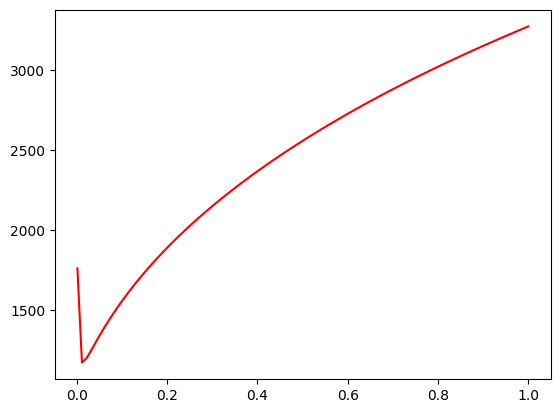

In [209]:
plt.plot(x, y , color = 'red')

In [210]:
idx = np.argmin(y)
idx

1

In [211]:
get_PP(x[1])

1171.4369246250424